In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import pyscisci.all as pyscisci
from brokenaxes import brokenaxes
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from scipy.stats import norm, ks_2samp
from collections import defaultdict
from scipy import stats
from scipy.stats import norm, ks_2samp
from adjustText import adjust_text

EF = FontProperties(family = 'Arial')

%matplotlib inline

In [3]:
Distribution = r' '
Distdf = pd.read_csv(Distribution)
del Distdf['Unnamed: 0']
print(Distdf .shape)
Distdf .columns

(1509324, 6)


Index(['work_id', 'author_position', 'author_id', 'institution_id', 'Journal',
       'country_code'],
      dtype='object')

In [5]:
Sciencedf = Distdf[Distdf['Journal']=='Science']
print(Sciencedf .shape)

(367353, 6)


In [ ]:
authordistribution = Sciencedf[['work_id','author_position','author_id']]
firstauthordistribution = authordistribution[authordistribution['author_position']=='first']
print(firstauthordistribution .shape)

numpub_first_author = firstauthordistribution .groupby(['author_id'])['work_id'].nunique().reset_index()
numpub_first_author = numpub_first_author .rename(columns = {'work_id':'numpub'})
numpub_first_author = numpub_first_author.sort_values(by = ['numpub'], ascending = False)
numpub_first_author['Rank'] = numpub_first_author['numpub'].rank(ascending = False, method='min')
numpub_first_author .head(3)

(134035, 3)


,author_id,numpub,Rank
64489,https://openalex.org/A5109954882,187,1.0
3363,https://openalex.org/A5005563472,154,2.0
73119,https://openalex.org/A5114252045,135,3.0


In [24]:
allauthordistribution = authordistribution[['work_id','author_id']]
print(allauthordistribution .shape)

numpub_all_author = allauthordistribution .groupby(['author_id'])['work_id'].nunique().reset_index()
numpub_all_author = numpub_all_author .rename(columns = {'work_id':'numpub'})
numpub_all_author = numpub_all_author .sort_values(by = ['numpub'], ascending = False)
numpub_all_author['Rank'] = numpub_all_author['numpub'].rank(ascending = False, method='min')
numpub_all_author .head(3)

(367353, 2)


,author_id,numpub,Rank
193503,https://openalex.org/A5109954882,187,1.0
10140,https://openalex.org/A5005563472,154,2.0
213144,https://openalex.org/A5114252045,137,3.0


In [25]:
instdistribution = Sciencedf[['work_id','author_position','institution_id']]

firstinstdistribution = instdistribution[instdistribution['author_position']=='first']

print(firstinstdistribution .shape)

numpub_first_inst = firstinstdistribution .groupby(['institution_id'])['work_id'].nunique().reset_index()
numpub_first_inst = numpub_first_inst .rename(columns = {'work_id':'numpub'})
numpub_first_inst = numpub_first_inst .sort_values(by = ['numpub'], ascending = False)
numpub_first_inst['Rank'] = numpub_first_inst['numpub'].rank(ascending = False, method='min')
numpub_first_inst .head(3)

(134035, 3)


,institution_id,numpub,Rank
1110,https://openalex.org/I136199984,2955,1.0
7236,https://openalex.org/I95457486,2475,2.0
7256,https://openalex.org/I97018004,2473,3.0


In [51]:
allinstdistribution = instdistribution[['work_id','institution_id']]
print(allinstdistribution .shape)

numpub_all_inst = allinstdistribution .groupby(['institution_id'])['work_id'].nunique().reset_index()
numpub_all_inst = numpub_all_inst .rename(columns = {'work_id':'numpub'})
numpub_all_inst = numpub_all_inst .sort_values(by = ['numpub'], ascending = False)
numpub_all_inst['Rank'] = numpub_all_inst['numpub'].rank(ascending = False, method='min')
numpub_all_inst .head(3)

(367353, 2)


,institution_id,numpub,Rank
1428,https://openalex.org/I136199984,3904,1.0
10694,https://openalex.org/I95457486,3026,2.0
10719,https://openalex.org/I97018004,3007,3.0


In [27]:
coundistribution = Sciencedf[['work_id','author_position','country_code']]

firstcoundistribution = coundistribution[coundistribution['author_position']=='first']

print(firstcoundistribution .shape)

numpub_first_coun = firstcoundistribution .groupby(['country_code'])['work_id'].nunique().reset_index()
numpub_first_coun = numpub_first_coun .rename(columns = {'work_id':'numpub'})
numpub_first_coun = numpub_first_coun .sort_values(by = ['numpub'], ascending = False)
numpub_first_coun['Rank'] = numpub_first_coun['numpub'].rank(ascending = False, method='min')
numpub_first_coun .head(3)

(134035, 3)


,country_code,numpub,Rank
133,US,110622,1.0
42,GB,4361,2.0
15,CA,3533,3.0


In [52]:
allcoundistribution = coundistribution[['work_id','country_code']]
print(allcoundistribution .shape)

numpub_all_coun = allcoundistribution .groupby(['country_code'])['work_id'].nunique().reset_index()
numpub_all_coun = numpub_all_coun .rename(columns = {'work_id':'numpub'})
numpub_all_coun = numpub_all_coun .sort_values(by = ['numpub'], ascending = False)
numpub_all_coun['Rank'] = numpub_all_coun['numpub'].rank(ascending = False, method='min')
numpub_all_coun .head(3)

(367353, 2)


,country_code,numpub,Rank
159,US,113864,1.0
52,GB,5932,2.0
23,CA,4394,3.0


R2 0.9819238560845053 slope -0.7327335675864788 p_value 0.0
R2 0.9750196541136228 slope -1.461783888214544 p_value 0.0
R2 0.9529976473979499 slope -2.497619850660419 p_value 1.6645484476214323e-95
R2 0.9769447139095507 slope -0.7168565087953495 p_value 0.0
R2 0.9728348360191356 slope -1.459547032770448 p_value 0.0
R2 0.9576342168193008 slope -2.4156393642353637 p_value 2.9322870082971173e-117


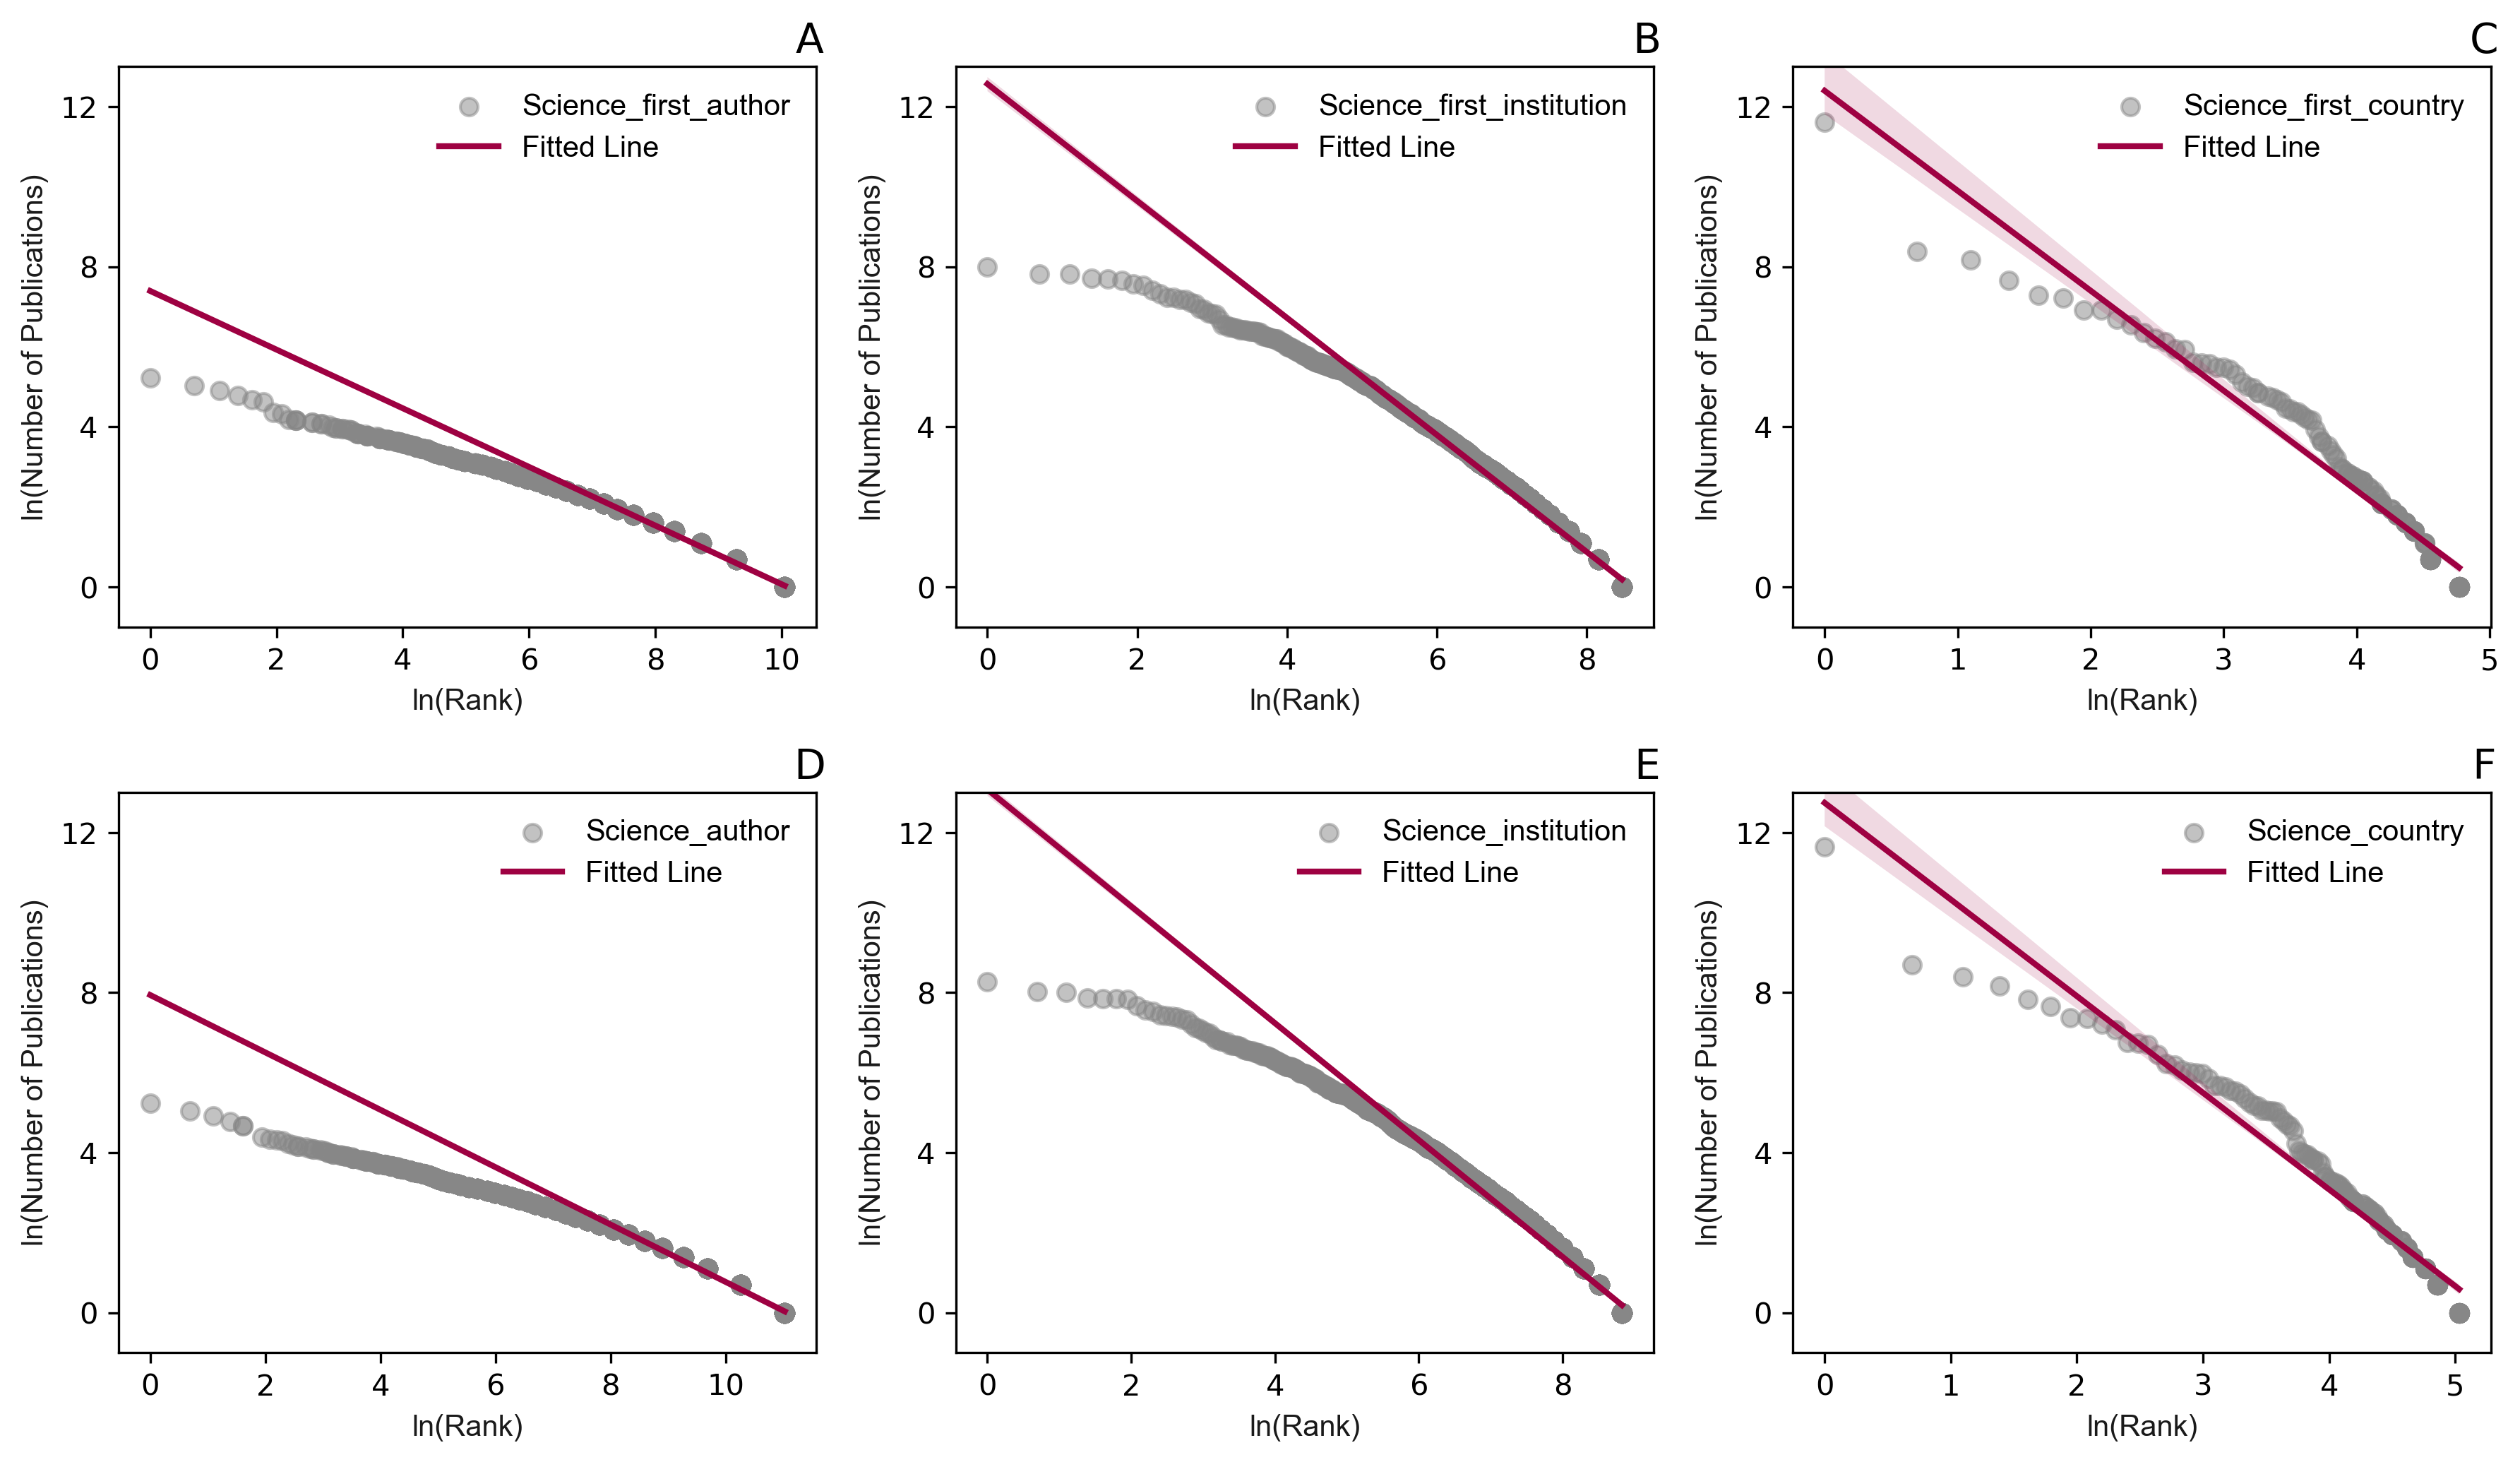

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (12, 7), dpi = 300)

df00 = numpub_first_author
df00['log_rank'] = np.log(df00['Rank'])
df00['log_numpub'] = np.log(df00['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df00['log_rank'], df00['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df00['log_rank'] + intercept
axes[0,0].scatter(df00['log_rank'], df00['log_numpub'], color='#878787', alpha=0.5, label='Science_first_author')
sns.regplot(data=df00, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[0,0], label='Fitted Line')
axes[0,0].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,0].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,0].set_ylim(-1, 13)
axes[0,0].yaxis.set_major_locator(MultipleLocator(4))
axes[0,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df01 = numpub_first_inst
df01['log_rank'] = np.log(df01['Rank'])
df01['log_numpub'] = np.log(df01['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df01['log_rank'], df01['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df01['log_rank'] + intercept
axes[0,1].scatter(df01['log_rank'], df01['log_numpub'], color='#878787', alpha=0.5, label='Science_first_institution')
sns.regplot(data=df01, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[0,1], label='Fitted Line')
axes[0,1].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,1].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,1].set_ylim(-1, 13)
axes[0,1].yaxis.set_major_locator(MultipleLocator(4))
axes[0,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df02 = numpub_first_coun
df02['log_rank'] = np.log(df02['Rank'])
df02['log_numpub'] = np.log(df02['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df02['log_rank'], df02['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df02['log_rank'] + intercept
axes[0,2].scatter(df02['log_rank'], df02['log_numpub'], color='#878787', alpha=0.5, label='Science_first_country')
sns.regplot(data=df02, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[0,2], label='Fitted Line')
axes[0,2].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,2].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0,2].set_ylim(-1, 13)
axes[0,2].yaxis.set_major_locator(MultipleLocator(4))
axes[0,2].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df10 = numpub_all_author
df10['log_rank'] = np.log(df10['Rank'])
df10['log_numpub'] = np.log(df10['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df10['log_rank'], df10['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df10['log_rank'] + intercept
axes[1,0].scatter(df10['log_rank'], df10['log_numpub'], color='#878787', alpha=0.5, label='Science_author')
sns.regplot(data=df10, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[1,0], label='Fitted Line')
axes[1,0].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,0].set_ylim(-1, 13)
axes[1,0].yaxis.set_major_locator(MultipleLocator(4))
axes[1,0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df11 = numpub_all_inst
df11['log_rank'] = np.log(df11['Rank'])
df11['log_numpub'] = np.log(df11['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df11['log_rank'], df11['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df11['log_rank'] + intercept
axes[1,1].scatter(df11['log_rank'], df11['log_numpub'], color='#878787', alpha=0.5, label='Science_institution')
sns.regplot(data=df11, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[1,1], label='Fitted Line')
axes[1,1].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,1].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,1].set_ylim(-1, 13)
axes[1,1].yaxis.set_major_locator(MultipleLocator(4))
axes[1,1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

df12 = numpub_all_coun
df12['log_rank'] = np.log(df12['Rank'])
df12['log_numpub'] = np.log(df12['numpub'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df12['log_rank'], df12['log_numpub'])
print('R2', r_value**2, 'slope', slope, 'p_value', p_value)
fitted_line = slope * df12['log_rank'] + intercept
axes[1,2].scatter(df12['log_rank'], df12['log_numpub'], color='#878787', alpha=0.5, label='Science_country')
sns.regplot(data=df12, x='log_rank', y='log_numpub',
            scatter=False, line_kws={'color': '#9e0142', 'lw': 2}, ci=95, ax=axes[1,2], label='Fitted Line')
axes[1,2].set_xlabel('ln(Rank)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,2].set_ylabel('ln(Number of Publications)', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1,2].set_ylim(-1, 13)
axes[1,2].yaxis.set_major_locator(MultipleLocator(4))
axes[1,2].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper right')

for i, ax in enumerate(axes.flat):
    ax.text(0.99, 1.01, chr(65 + i), transform=ax.transAxes, 
            fontsize=14, verticalalignment='bottom', horizontalalignment='center')

plt.tight_layout()
plt.savefig(r' ')
plt.show()